# Preprocessing Workflow


🎯 This exercise will take you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

👇 Download the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) and save it in the `data` folder as `ML_Houses_dataset.csv`. Then, run the code below to load the dataset and features you will be working with.

In [570]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


👉 Take the time to do a preliminary investigation of the features by reading the dataset description available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to use refer to it throughout the day.

# Duplicates

ℹ️ Duplicates in datasets can cause data leakage. It is important to locate and remove any meaningless duplicates.

❓ How many duplicated rows are there in the dataset? Save your answer under variable name `duplicate_count`.

In [571]:
# YOUR CODE HERE
len(data)

1760

In [572]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1755     True
1756     True
1757     True
1758     True
1759     True
Length: 1760, dtype: bool

In [573]:
duplicate_count=data.duplicated().sum()
duplicate_count

300

👇 Remove the duplicates from the dataset. Overwite the dataframe `data`.

In [574]:
# YOUR CODE HERE
data=data.drop_duplicates()
len(data)

1460

### ☑️ Test your code

In [575]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_duplicates.py::TestDuplicates::test_dataset_length PASSED     [ 50%]
tests/test_duplicates.py::TestDuplicates::test_duplicate_count PASSED    [100%]

============================== 2 passed in 0.54s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master


# Missing data

👇 Print out the percentage of missing values for all columns of the dataframe.

In [576]:
# YOUR CODE HERE
data.isnull().sum().sort_values(ascending=False)

GarageFinish    81
RoofSurface      9
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
OverallCond      0
CentralAir       0
ChimneyStyle     0
MoSold           0
SalePrice        0
dtype: int64

In [577]:
data.isnull().sum().sort_values(ascending=False)/len(data)

GarageFinish    0.055479
RoofSurface     0.006164
GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

## `GarageFinish`

In [578]:
data[["GarageFinish"]].dtypes

GarageFinish    object
dtype: object

In [579]:
data[["GarageFinish"]]

,GarageFinish
0,RFn
1,RFn
2,RFn
3,Unf
4,RFn
...,...
1455,RFn
1456,Unf
1457,RFn
1458,Unf


In [580]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,1698.0,RFn,Y,?,8,175000
1456,2073,3,1,6,2645.0,Unf,Y,?,2,210000
1457,2340,4,1,9,722.0,RFn,Y,?,5,266500
1458,1078,2,1,6,3501.0,Unf,Y,?,4,142125


In [581]:
data["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

👇 Investigate the missing values in `GarageFinish`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [582]:
# YOUR CODE HERE
import numpy as np

data["GarageFinish"].replace(np.nan,"no garage",inplace=True)

# from sklearn import preprocessing

# le=preprocessing.LabelEncoder()
# le.fit(data["GarageFinish"])
# data["GarageFinish"]=le.transform(data["GarageFinish"])
# data


#drop


# data.drop(columns="GarageFinish",inplace=True)
# data.head()
#drop
# data.GarageFinish.replace(np.nan,data.GarageFinish.mean())

#drop
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(strategy="mean")

# imputer.fit(data[["GarageFinish"]])
# data["GarageFinish"]=imputer.transeform[data[["GarageFinish"]]]
# imputer.statistics_


In [583]:
data["GarageFinish"].value_counts()

Unf          605
RFn          422
Fin          352
no garage     81
Name: GarageFinish, dtype: int64

## `RoofSurface`

👇 Investigate the missing values in `RoofSurface`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [584]:
# YOUR CODE HERE
data["RoofSurface"].isnull().sum()
data.replace(np.nan,data["RoofSurface"].mean(),inplace=True)
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,1698.0,RFn,Y,?,8,175000
1456,2073,3,1,6,2645.0,Unf,Y,?,2,210000
1457,2340,4,1,9,722.0,RFn,Y,?,5,266500
1458,1078,2,1,6,3501.0,Unf,Y,?,4,142125


👇 When you are done, print out the percentage of missing values for the entire dataframe.

In [585]:
# YOUR CODE HERE
data["RoofSurface"].isnull().sum()/len(data)

0.0

⚠️ Be careful: not all missing values are represented `np.nans`, and python's `isnull()` only detects `np.nans` ⚠️

## `ChimneyStyle`

👇 Investigate the missing values in `ChimneyStyle`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
</details>

In [586]:
# YOUR CODE HERE
data.drop(columns="ChimneyStyle",inplace=True)
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


### ☑️ Test your code

In [587]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_nans PASSED       [ 50%]
tests/test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.51s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

##  `RoofSurface` 

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

<AxesSubplot:>

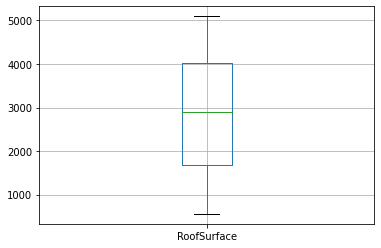

In [588]:
# YOUR CODE HERE
data[["RoofSurface"]].boxplot()

(array([151., 150., 124., 124., 153., 166., 134., 156., 143., 159.]),
 array([ 558. , 1011.7, 1465.4, 1919.1, 2372.8, 2826.5, 3280.2, 3733.9,
        4187.6, 4641.3, 5095. ]),
 <BarContainer object of 10 artists>)

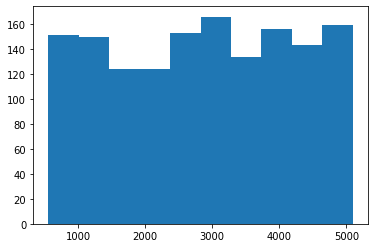

In [589]:
import matplotlib.pyplot as plt
plt.hist(data["RoofSurface"])

In [590]:
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

In [591]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[["RoofSurface"]]=scaler.fit_transform(data[["RoofSurface"]])
data


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,0.316729,RFn,Y,2,208500
1,1262,3,1,8,0.069650,RFn,Y,5,181500
2,1786,3,1,5,0.228124,RFn,Y,9,223500
3,1717,3,1,5,0.442583,Unf,Y,2,140000
4,2198,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,1647,3,1,5,0.251267,RFn,Y,8,175000
1456,2073,3,1,6,0.459996,Unf,Y,2,210000
1457,2340,4,1,9,0.036147,RFn,Y,5,266500
1458,1078,2,1,6,0.648667,Unf,Y,4,142125


## `GrLivArea`

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

(array([  5., 357., 641., 334.,  97.,  17.,   5.,   2.,   1.,   1.]),
 array([-1.0000e+00,  5.6330e+02,  1.1276e+03,  1.6919e+03,  2.2562e+03,
         2.8205e+03,  3.3848e+03,  3.9491e+03,  4.5134e+03,  5.0777e+03,
         5.6420e+03]),
 <BarContainer object of 10 artists>)

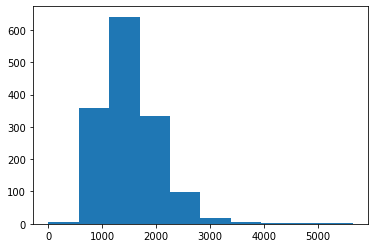

In [592]:
# YOUR CODE HERE
plt.hist(data["GrLivArea"])

<AxesSubplot:>

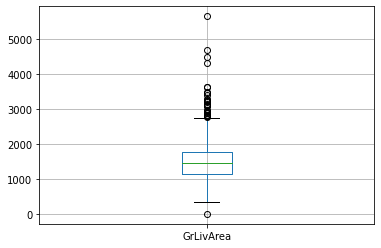

In [593]:
data[["GrLivArea"]].boxplot()

<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

In [594]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()
data["GrLivArea"]=r_scaler.fit_transform(data[["GrLivArea"]])
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282735,3,1,5,0.251267,RFn,Y,8,175000
1456,0.940904,3,1,6,0.459996,Unf,Y,2,210000
1457,1.353418,4,1,9,0.036147,RFn,Y,5,266500
1458,-0.596369,2,1,6,0.648667,Unf,Y,4,142125


## `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scale
2. Standard Scale
3. Robust Scale

Replace the original columns by the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

In [595]:
# YOUR CODE HERE
data[["BedroomAbvGr", "OverallCond" , "KitchenAbvGr"]]

,BedroomAbvGr,OverallCond,KitchenAbvGr
0,3,5,1
1,3,8,1
2,3,5,1
3,3,5,1
4,4,5,1
...,...,...,...
1455,3,5,1
1456,3,6,1
1457,4,9,1
1458,2,6,1


(array([  6.,  50., 358., 804.,   0., 213.,  21.,   7.,   0.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

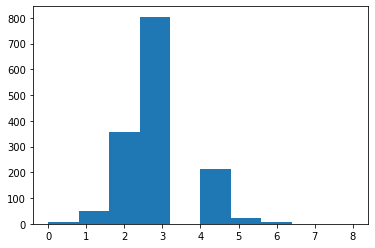

In [596]:
plt.hist(data["BedroomAbvGr"])

<AxesSubplot:>

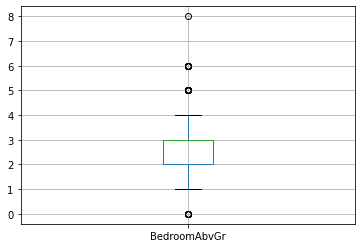

In [597]:
data[["BedroomAbvGr"]].boxplot()

In [598]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282735,3,1,5,0.251267,RFn,Y,8,175000
1456,0.940904,3,1,6,0.459996,Unf,Y,2,210000
1457,1.353418,4,1,9,0.036147,RFn,Y,5,266500
1458,-0.596369,2,1,6,0.648667,Unf,Y,4,142125


In [599]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data[["BedroomAbvGr", "OverallCond" , "KitchenAbvGr"]]=scaler.fit_transform(data[["BedroomAbvGr", "OverallCond" , "KitchenAbvGr"]])
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,RFn,Y,8,175000
1456,0.940904,0.375,0.333333,0.625,0.459996,Unf,Y,2,210000
1457,1.353418,0.500,0.333333,1.000,0.036147,RFn,Y,5,266500
1458,-0.596369,0.250,0.333333,0.625,0.648667,Unf,Y,4,142125


### ☑️ Test your code

In [600]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 3 items

tests/test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED [ 33%]
tests/test_scaling.py::TestScaling::test_gr_liv_area PASSED              [ 66%]
tests/test_scaling.py::TestScaling::test_roof_surface PASSED             [100%]

============================== 3 passed in 0.50s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Feature Engineering

## `GarageFinish`

👇 Investigate `GarageFinish` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


<details>
    <summary>💡 Hint</summary>
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

In [601]:
# YOUR CODE HERE
data["GarageFinish"]

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [602]:
data["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', 'no garage'], dtype=object)

In [603]:
columns=['RFn', 'Unf', 'Fin', 'no garage'],

In [604]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe=OneHotEncoder(sparse = False)
ohe.fit(data[['GarageFinish']])
alley_encoded =ohe.transform(data[['GarageFinish']])
alley_encoded 

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [605]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000
...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,RFn,Y,8,175000
1456,0.940904,0.375,0.333333,0.625,0.459996,Unf,Y,2,210000
1457,1.353418,0.500,0.333333,1.000,0.036147,RFn,Y,5,266500
1458,-0.596369,0.250,0.333333,0.625,0.648667,Unf,Y,4,142125


In [606]:
data[['RFn', 'Unf', 'Fin', 'no garage']]=alley_encoded 
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice,RFn,Unf,Fin,no garage
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500,0.0,1.0,0.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000,0.0,0.0,1.0,0.0
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,RFn,Y,8,175000,0.0,1.0,0.0,0.0
1456,0.940904,0.375,0.333333,0.625,0.459996,Unf,Y,2,210000,0.0,0.0,1.0,0.0
1457,1.353418,0.500,0.333333,1.000,0.036147,RFn,Y,5,266500,0.0,1.0,0.0,0.0
1458,-0.596369,0.250,0.333333,0.625,0.648667,Unf,Y,4,142125,0.0,0.0,1.0,0.0


In [607]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice,RFn,Unf,Fin,no garage
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500,0.0,1.0,0.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000,0.0,0.0,1.0,0.0
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,RFn,Y,8,175000,0.0,1.0,0.0,0.0
1456,0.940904,0.375,0.333333,0.625,0.459996,Unf,Y,2,210000,0.0,0.0,1.0,0.0
1457,1.353418,0.500,0.333333,1.000,0.036147,RFn,Y,5,266500,0.0,1.0,0.0,0.0
1458,-0.596369,0.250,0.333333,0.625,0.648667,Unf,Y,4,142125,0.0,0.0,1.0,0.0


In [608]:
data.drop(columns="GarageFinish",inplace=True)

# data=data.drop(columns="GarageFinish")

In [609]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,RFn,Unf,Fin,no garage
0,0.380070,0.375,0.333333,0.500,0.316729,Y,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,Y,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,Y,9,223500,0.0,1.0,0.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Y,2,140000,0.0,0.0,1.0,0.0
4,1.134029,0.500,0.333333,0.500,0.566894,Y,12,250000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,Y,8,175000,0.0,1.0,0.0,0.0
1456,0.940904,0.375,0.333333,0.625,0.459996,Y,2,210000,0.0,0.0,1.0,0.0
1457,1.353418,0.500,0.333333,1.000,0.036147,Y,5,266500,0.0,1.0,0.0,0.0
1458,-0.596369,0.250,0.333333,0.625,0.648667,Y,4,142125,0.0,0.0,1.0,0.0


## Encoding  `CentralAir`

👇 Investigate `CentralAir` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column by the encoding.


<details>
    <summary>💡 Hint</summary>
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [610]:
# YOUR CODE HERE
data["CentralAir"]


0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object

In [611]:
data["CentralAir"].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [612]:
data["CentralAir"].unique()

array(['Y', 'N'], dtype=object)

In [615]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()
enc.fit(data[["CentralAir"]])
enc_array=enc.transform(data[["CentralAir"]])
enc_array


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [616]:
data["CentralAir"]=enc_array

In [617]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,RFn,Unf,Fin,no garage
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,1.0,0.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,1.0,0.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,1.0,0.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,1.0,0.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,1.0,8,175000,0.0,1.0,0.0,0.0
1456,0.940904,0.375,0.333333,0.625,0.459996,1.0,2,210000,0.0,0.0,1.0,0.0
1457,1.353418,0.500,0.333333,1.000,0.036147,1.0,5,266500,0.0,1.0,0.0,0.0
1458,-0.596369,0.250,0.333333,0.625,0.648667,1.0,4,142125,0.0,0.0,1.0,0.0


## `MoSold` - Cyclical engineering 

Data can be continuous, discrete, categorical, ordinal, but it can also be cyclical. Temporal data is a prime example of that: months, days, minutes. Such data needs specific preprocessing for Machine Learning models to understand and consider its cyclical nature.

Consider the feature `MoSold`, the month on which the house was sold. If left as is, a model would not understand that after 12 (December) comes 1 (January). It would only consider the values on a linear scale.

👇 Do your own investigation on how to preprocess cyclical features in Machine Learning. Then, transform `MoSold` according to your findings.

⚠️ Replace the original column by the new features.

<details>
    <summary>💡 Hint</summary>
ℹ️ This <a href='https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time' target='blank'>article</a> explains how to deal with cyclical features.
    
</details>

**❓ How would you name these 2 new features?**

Let's add two new columns to your data frame, `sin_MoSold` and `cos_MoSold`, containing the sine and cosine of the `MoSold` column respectively.  Once these columns are added we can drop the original `MoSold` column.

In [618]:
# YOUR CODE HERE


In [619]:
data["MoSold"]

0        2
1        5
2        9
3        2
4       12
        ..
1455     8
1456     2
1457     5
1458     4
1459     6
Name: MoSold, Length: 1460, dtype: int64

In [620]:
data["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [624]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data["sin_MoSold"]=np.sin((data["MoSold"]-1)*(2 * np.pi/12))
data["cos_MoSold"]=np.cos(2 * np.pi * data["MoSold"])

In [627]:
data.drop(columns="MoSold",inplace=True)

In [628]:
data

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,RFn,Unf,Fin,no garage,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,1.0,0.0,0.0,0.500000,1.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,1.0,0.0,0.0,0.866025,1.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,1.0,0.0,0.0,-0.866025,1.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,1.0,0.0,0.500000,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,1.0,0.0,0.0,-0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,0.251267,1.0,175000,0.0,1.0,0.0,0.0,-0.500000,1.0
1456,0.940904,0.375,0.333333,0.625,0.459996,1.0,210000,0.0,0.0,1.0,0.0,0.500000,1.0
1457,1.353418,0.500,0.333333,1.000,0.036147,1.0,266500,0.0,1.0,0.0,0.0,0.866025,1.0
1458,-0.596369,0.250,0.333333,0.625,0.648667,1.0,142125,0.0,0.0,1.0,0.0,1.000000,1.0


### ☑️ Test your code

In [629]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 4 items

tests/test_encoding.py::TestEncoding::test_central_air PASSED            [ 25%]
tests/test_encoding.py::TestEncoding::test_columns PASSED                [ 50%]
tests/test_encoding.py::TestEncoding::test_month_sold_features PASSED    [ 75%]
tests/test_encoding.py::TestEncoding::test_month_sold_features_number PASSED [100%]

============================== 4 passed in 0.54s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


# Export the dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [630]:
data.to_csv("../02-Feature-Selection/data/clean_dataset.csv", index=False)

# 🏁